# Predict IMDB Rating Class with Machine Learning Algorithms  

*Jill Han  
06/15/2020*

1. Introduction  

   1.1 Data Description  
   1.2 Problem Object   
    
    
2. Exploratory Data Analysis  

   2.1 Data Profile     
      * Data Variables  
      * Data Types  
      * Descriptive statistics 
   
   2.2 Data Cleaning
      * Duplicates Data  
      * Remove Redundant Variables
      * Missing Values     
   
   2.3 Data Visualization  
      * Univariate distributions   
            - Barplot of important categorical variables
            - Histogram of important numerical variables                
      * Bivariate distributions
            - Pairlot between two Numerical variables
            - Boxplot between a Numerical variable and Categorical Variable
      
      * Correlations   
            
            
3. Data Pre-processing

   3.1 Bin Response Variable     
    
    
4. Building Classification Models with Multiple Algorithms  

   4.1 Make a pipeline for data preprocessing  
   4.2 Multiple Algorithms
      * Logistic Regression
      * Random Forest
      * XGBoost  Classifier
      * Deep-Learning models
   
   4.3 Make a pipeline for data prediction
   4.4 Interpretation of classification models results

5.  Conclusion  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

%matplotlib inline

## 1. Introduction

### 1.1 Data Description

    This dataset contains the movies' basic information, online reviews, IMDB rating scores as well from IMDb database. It contains 5043 observations and 28 variables. Those movies are released from 65 countries between 1916 and 2016. 
    Dtypes: float64(13), int64(3), object(12). 
   
|  #  | Variables    |Dtype       |  
|:-----| :--------------    | :--------------  |   
| 0   |  color      | object  |
| 1   |director_name| object  |
| 2   |num_critic_for_reviews  | float |
| 3   |duration                | float |
| 4   |director_facebook_likes | float |
| 5   |actor_3_facebook_likes  | float |
| 6   | actor_2_name  |  object |
| 7   |actor_1_facebook_likes   | float |
| 8   |gross              | float |
| 9   |genres             |  object |
| 10  |actor_1_name  | object |
| 11  |movie_title   | object |
| 12  |num_voted_users | int | 
| 13  |cast_total_facebook_likes | int |  
| 14  |actor_3_name  | object |
| 15  |facenumber_in_poster | float |
| 16  |plot_keywords | object |
| 17  |movie_imdb_link | object |
| 18  |num_user_for_reviews | float |
| 19  |language | object |
| 20  |country | object |
| 21  |content_rating | object |
| 22  |budget| float |
| 23  |title_year | float |
| 24  |actor_2_facebook_likes | float |
| 25  |imdb_score | float |
| 26  |aspect_ratio | float |
| 27  |movie_facebook_likes| int |

### 1.2  Project Objective
    Although IMDb rating is not absolutely accurate, it can be considered as a useful and informative tool to evaluate whether a film is successful. Which type of films are intend to be successful? What factors are crucial for a movie to get a higher IMDb rating score? The answers are trying to be found by analyzing the variables of this dataset.

    In this project, imdb_score is chose as the response variable. We are building prediction models with several algorithms and evaluating them. The optimized model can be used to predict IMDb rating score with other variables from this dataset. It will be helpful for the film companies to get the trick of successful movies.

## 2. Exploratory Data Analysis  

### 2.1 Data Profile  

   - **Data Variables**

In [2]:
path = "/Users/jill/Downloads/RangTech/"
movie = pd.read_csv(path + "movie_metadata.csv")
movie_df = movie.copy()

In [3]:
nrows, ncols = movie_df.shape
print ("This IMDB movie dataset includes %d rows and %d columns." % (nrows, ncols))

This IMDB movie dataset includes 5043 rows and 28 columns.


In [4]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

   - **Data Types**

In [7]:
num_cols = list(movie_df.select_dtypes(include=['float','int']).columns)
num_lens = len(num_cols)
print ('There are %d numerical columns:\n'% num_lens)
print (num_cols)

There are 16 numerical columns:

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [8]:
star = movie_df['title_year'].min()
end = movie_df['title_year'].max()
print ("These movies are released from %d to %d."%(star, end))

These movies are released from 1916 to 2016.


In [9]:
obj_cols = list(movie_df.select_dtypes(include='object').columns)
obj_lens = len(obj_cols)
print ('There are %d object columns:\n'% obj_lens)
print (obj_cols)

There are 12 object columns:

['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


Depending on the properties of variables, these columns dtypes should be convert into categorical dtype.

In [10]:
movie_df[obj_cols] = movie_df[obj_cols].astype('category')

In [11]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5024 non-null   category
 1   director_name              4939 non-null   category
 2   num_critic_for_reviews     4993 non-null   float64 
 3   duration                   5028 non-null   float64 
 4   director_facebook_likes    4939 non-null   float64 
 5   actor_3_facebook_likes     5020 non-null   float64 
 6   actor_2_name               5030 non-null   category
 7   actor_1_facebook_likes     5036 non-null   float64 
 8   gross                      4159 non-null   float64 
 9   genres                     5043 non-null   category
 10  actor_1_name               5036 non-null   category
 11  movie_title                5043 non-null   category
 12  num_voted_users            5043 non-null   int64   
 13  cast_total_facebook_likes  5043 n

   * **Descriptive Statistics**

In [12]:
 movie_df.describe(include = ['int','float']).T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [13]:
movie_df.describe(include = ['category']).T

,count,unique,top,freq
color,5024,2,Color,4815
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Ben-Hur,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3
language,5031,47,English,4704


### 2.2 Data Cleaning

   #### 2.2.1 Duplicates Data    
   
   *Check and remove duplicates instances.*
   

In [14]:
movie_df.drop_duplicates(inplace=True)

In [15]:
movie_df.shape

(4998, 28)

  #### 2.2.2  Remove Redundant Variables    
  
*According the above table, "director_name", "actor_1_name","actor_2_name","actor_3_name", "movie_title", "plot_keywords", "movie_imdb_link" have too many levels.*   

*It is not helpful to use these variables in predictable models, especially in a small dataset. Thus these variables are able to be removed.*

In [16]:
namesLst = ["director_name", "actor_1_name","actor_2_name","actor_3_name", "movie_title", "plot_keywords", "movie_imdb_link"]
movie_df.drop(namesLst, axis=1, inplace=True)


In [17]:
movie_df.shape

(4998, 21)

In [18]:
movie_df.describe(include = ['category']).T

,count,unique,top,freq
color,4979,2,Color,4772
genres,4998,914,Drama,235
language,4986,47,English,4662
country,4993,65,USA,3773
content_rating,4697,18,R,2098


              
   *The top levels of categorical variables -- "color","language","country" have taken most part from these variables. Exploring the 3 variables separately to decide whether to drop them.*

In [19]:
movie_df["color"].value_counts()

Color               4772
 Black and White     207
Name: color, dtype: int64

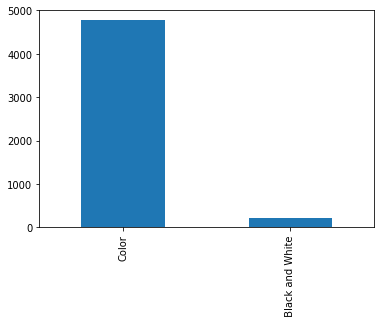

In [20]:
movie_df["color"].value_counts().plot(kind = 'bar')

In [21]:
top_perct_color = 4772/4979 * 100
top_perct_color 

95.842538662382

  
    
   #### 2.2.3 Color
   
   *There are more than 95% movies are colored. It indicates that this variable is almost fixed.*    
   *Since there is no point to predictable models, I remove this predictor.*

In [22]:
movie_df.drop('color', axis=1, inplace=True)

In [23]:
movie_df["language"].value_counts()

English       4662
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Italian         11
Cantonese       11
Russian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Danish           5
Hebrew           5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Indonesian       2
Dari             2
Icelandic        2
Zulu             2
Aboriginal       2
Romanian         2
None             2
Slovenian        1
Urdu             1
Aramaic          1
Bosnian          1
Telugu           1
Tamil            1
Czech            1
Swahili          1
Vietnamese       1
Hungarian        1
Dzongkha         1
Panjabi          1
Filipino         1
Mongolian        1
Greek            1
Maya             1
Kazakh           1
Kannada          1
Name: language, dtype: int64

In [24]:
top_perct_lang = 4662/4986 * 100
top_perct_lang

93.50180505415162

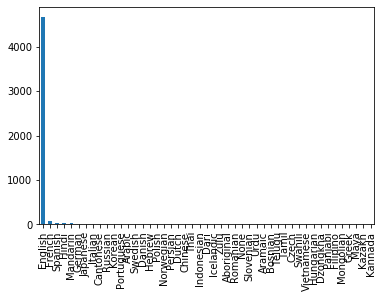

In [25]:
movie_df["language"].value_counts().plot(kind = 'bar')


     
   #### 2.2.4 Language   
   
   *This variable is as same as the previous one. More than 93% are English movies.    
    Remove 'Language' as well.*

In [26]:
movie_df.drop('language', axis=1, inplace=True)

In [27]:
movie_df["country"].value_counts()

USA            3773
UK              443
France          154
Canada          124
Germany          96
               ... 
New Line          1
Indonesia         1
Libya             1
Kyrgyzstan        1
Afghanistan       1
Name: country, Length: 65, dtype: int64

In [28]:
usa_perc, uk_perc, other_perc = 3773/4993*100, 443/4993*100, (4993-3773-443)/4993*100
print (usa_perc, uk_perc, other_perc)

75.56579210895254 8.872421389945924 15.561786501101544


   #### 2.2.5  Country  

   *There are about 75% movies from USA, 9% from UK, and 16% from other 63 countries.*   
   *Other countries are grouped as 'others' to reduce the number of levels.*

In [29]:
vals = movie_df.country.value_counts()[:2].index.remove_unused_categories()
print (vals)

CategoricalIndex(['USA', 'UK'], categories=['UK', 'USA'], ordered=False, dtype='category')


In [30]:
movie_df['country'] = movie_df.country.astype('object').where(movie_df.country.isin(vals), 'other_countries')

In [31]:
movie_df['country'] = movie_df['country'].astype('category')

In [32]:
movie_df['country'].value_counts()

USA                3773
other_countries     782
UK                  443
Name: country, dtype: int64

In [33]:
movie_df.describe(include = ['category']).T

,count,unique,top,freq
genres,4998,914,Drama,235
country,4998,3,USA,3773
content_rating,4697,18,R,2098


#### 2.2.6 Genres 

*This feature has many categories, exploring and analyzing it to decide to remove or reduce the number of categories.*

In [34]:
movie_df.genres.value_counts()

Drama                                       235
Comedy                                      205
Comedy|Drama                                189
Comedy|Drama|Romance                        187
Comedy|Romance                              158
                                           ... 
Adventure|Drama|History|Romance               1
Crime|Thriller|War                            1
Adventure|Drama|Fantasy|Thriller|Western      1
Adventure|Drama|Fantasy|Mystery|Thriller      1
Adventure|Fantasy|Thriller                    1
Name: genres, Length: 914, dtype: int64

   *A lot of values of this column combines multiple genres.   
    To analyze whether each genre is related to IMDb score (response variable), the values need to be separated.*

In [35]:
# Create a new df to analyze the relationship between genres and IMDb_score.
genres_df = movie_df.loc[:,['imdb_score','genres']]

In [36]:
genres_df.head()

,imdb_score,genres
0,7.9,Action|Adventure|Fantasy|Sci-Fi
1,7.1,Action|Adventure|Fantasy
2,6.8,Action|Adventure|Thriller
3,8.5,Action|Thriller
4,7.1,Documentary


In [37]:
def uni_value(df):
    """
    Gather total types of genres without duplicates.
    Return a list of genres types.
    """    
    uni_val = set()
    for i in range(df.shape[0]):
        value = df.iloc[i,1].split('|')
        uni_val.update(set(value))
    return list(uni_val)

In [38]:
genre_cat = uni_value(genres_df)

In [39]:
print ("There are %d categories in genres."%len(genre_cat))
print ()
print (genre_cat)

There are 26 categories in genres.

['Crime', 'Comedy', 'Horror', 'Romance', 'Documentary', 'Short', 'News', 'Mystery', 'Sci-Fi', 'Action', 'Music', 'Reality-TV', 'Fantasy', 'Adventure', 'Film-Noir', 'Thriller', 'History', 'War', 'Biography', 'Western', 'Game-Show', 'Drama', 'Family', 'Musical', 'Sport', 'Animation']


In [40]:
def onehot_df(df, collst):
    """
    One-hot code for categrical variable 'genres'
    Return a new dataframe with dummy values.
    """
    new_df = df.reindex(df.columns.tolist() + collst, axis=1)
    for i in range (new_df.shape[0]):    
        lst = new_df.iloc[i].genres.split('|')
        new_df.at[i,lst] = 1 
    new_df[collst] = new_df[collst].fillna(0)
    new_df.drop('genres', axis=1, inplace = True)
    return new_df

In [41]:
onehot_genres_df = onehot_df(genres_df,genre_cat)

In [42]:
onehot_genres_df.head()

,imdb_score,Crime,Comedy,Horror,Romance,Documentary,Short,News,Mystery,Sci-Fi,...,History,War,Biography,Western,Game-Show,Drama,Family,Musical,Sport,Animation
0,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[6.40022753 6.4616721  6.55163043 6.42813653 6.66610169 7.1
 5.95       6.48268839 6.47400662 6.41339207 6.50380952 7.15
 6.54766667 6.45614618 6.6        6.40563584 6.43088235 6.36095238
 6.52061856 6.49680851 6.3        6.41223529 6.53178439 6.6610687
 6.52651934 6.46192469]


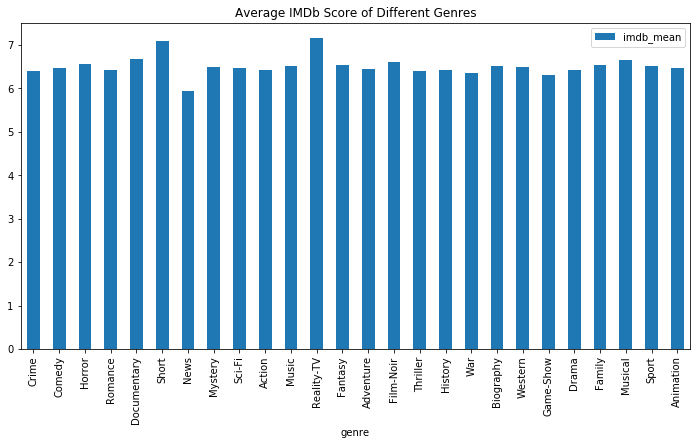

In [43]:
# Calculate the means of imdb_score for each genre and plot it.
mean_arr = np.zeros(26)
for i,genre in enumerate (genre_cat):
    mean = onehot_genres_df.imdb_score[onehot_genres_df[genre] == 1].mean()
    mean_arr[i] = mean
print (mean_arr)
# Create a new dataframe including 2 columns: 'genre', 'imdb_mean'. 
genrePlot_df = pd.DataFrame(list(zip(genre_cat, mean_arr)), columns = ['genre', 'imdb_mean']) 
# Plot the distribution of average IMDb score with different genres.
genrePlot_df.plot(x="genre", y= 'imdb_mean',kind = 'bar',
                 title = "Average IMDb Score of Different Genres",
                 figsize = (12,6))

*The average IMDb scores of different genres are in the range from 6 - 8, which means the IMDb score is not sensitive to the feature "genres".*

*So the variable “genres” can be removed.*

In [44]:
movie_df.drop('genres', axis=1, inplace=True)

### 2.3 Missing Values

In [45]:
movie_df.shape

(4998, 18)

In [46]:
missing_df = pd.DataFrame(movie_df.isna().sum().sort_values(ascending=False))

In [47]:
missing_df.reset_index(level=0, inplace=True)

In [48]:
missing_df.columns = ['variables', 'num_na']

In [49]:
def F(x):
    return float(x)/4998*100
missing_df['percentage'] = missing_df.apply(lambda x: F(x['num_na']), axis=1)

In [50]:
missing_df

,variables,num_na,percentage
0,gross,874,17.486995
1,budget,487,9.743898
2,aspect_ratio,327,6.542617
3,content_rating,301,6.022409
4,title_year,107,2.140856
5,director_facebook_likes,103,2.060824
6,num_critic_for_reviews,49,0.980392
7,actor_3_facebook_likes,23,0.460184
8,num_user_for_reviews,21,0.420168
9,duration,15,0.300120


We do not want to lose much data, especially for the variables that might be related with IMDb score.

In this case, Even numbers of missing values of "gross", "budget", "aspect_ratio" and "content_rating" are quite high, we will not drop the missing values. We will impute Nas after splitting data into training and test sets.

For other variables, the numbers of missing values are less, So that we can remove those na values from the dataset. 

In [51]:
missing_df.variables.values

array(['gross', 'budget', 'aspect_ratio', 'content_rating', 'title_year',
       'director_facebook_likes', 'num_critic_for_reviews',
       'actor_3_facebook_likes', 'num_user_for_reviews', 'duration',
       'facenumber_in_poster', 'actor_2_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'country', 'imdb_score',
       'movie_facebook_likes'], dtype=object)

In [52]:
na_cols = ['title_year','director_facebook_likes', 'num_critic_for_reviews',
       'actor_3_facebook_likes', 'num_user_for_reviews', 'duration',
       'facenumber_in_poster', 'actor_2_facebook_likes',
       'actor_1_facebook_likes']
movie_df.dropna(axis=0,subset=na_cols, inplace=True)

In [53]:
movie_df.shape

(4814, 18)

In [54]:
4814/5043

0.9545905215149713

**By now, we have 4814 instances left. We just lost 5% of the observations which is acceptable.**

### 2.3 Data Visualization

#### 2.3.1 Univariate distributions  

   - Bar plot of important categorical variables  
   - Histogram of important numerical variables  

In [55]:
movie_visual = movie_df.copy()

In [56]:
print (movie_visual.select_dtypes(['category']).columns)
print ()
print (movie_visual.select_dtypes(['float64','int64']).columns)

Index(['country', 'content_rating'], dtype='object')

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


**categorical variables**  
   - *Country*

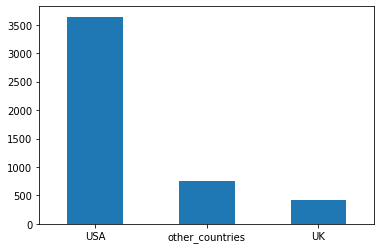

In [57]:
movie_visual['country'].value_counts().plot.bar(rot=0)

   - *Content_rating*

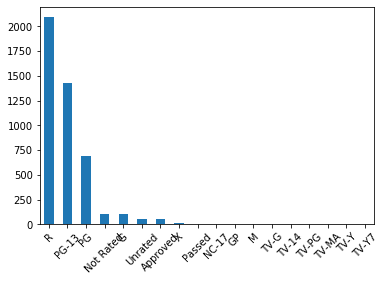

In [58]:
movie_visual['content_rating'].value_counts().plot.bar(rot=45)

In [59]:
movie_visual['content_rating'].value_counts()

R            2091
PG-13        1429
PG            693
Not Rated     110
G             109
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           1
TV-MA           0
TV-Y            0
TV-Y7           0
Name: content_rating, dtype: int64

In [60]:
movie_visual.content_rating.cat.categories

Index(['Approved', 'G', 'GP', 'M', 'NC-17', 'Not Rated', 'PG', 'PG-13',
       'Passed', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7',
       'Unrated', 'X'],
      dtype='object')

There are 3 categories which are unused and will be removed --  'TV-MA','TV-Y','TV-Y7'. 

TV ratings are another rating system for TV. Since they are not related to movies, 'TV-G', 'TV-14','TV-PG' are going to be removed.  

The film rating systems are changed by years. The latest ratings including:'PG', 'PG-13', 'R',' NC-17', 'G' and other labels ('Not Rated', 'Unrated').   

According the changing history of rating systems, 'PG' replaced 'M', 'GP', 'NC-17' replaced 'X'.  
(*https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system#:~:text=Rated%20G%3A%20General%20audiences%20%E2%80%93%20All,accompanying%20parent%20or%20adult%20guardian.*)  

'Approved' or 'passed' - They are labels before 1968. Based on whether they were 'moral' or 'immoral', films were approved or disapproved. Since 'R' has highest frequency, these two lables are replaced by 'R'.   
(*https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39#*)  


In [61]:
# Removing unused categories: 'TV-MA','TV-Y','TV-Y7'
movie_df['content_rating'] = movie_df.content_rating.cat.remove_categories(['TV-MA','TV-Y','TV-Y7'])

In [62]:
# Removing rows which content_rating =='TV-G' or 'TV-14' or 'TV-PG'.
movie_df.drop(movie_df[(movie_df['content_rating'] == 'TV-G') |
                       (movie_df['content_rating'] == 'TV-14') |
                       (movie_df['content_rating'] == 'TV-PG')].index,
             inplace = True)

In [63]:
# Removing categories: 'TV-G','TV-14','TV-PG'
movie_df['content_rating'] = movie_df.content_rating.cat.remove_categories(['TV-G','TV-14','TV-PG'])

In [64]:
# Replacing labels 'M','GP','X' by latestly rating system, and remove unused labels.
movie_df['content_rating'].loc[(movie_df['content_rating'] == 'M')|
                               (movie_df['content_rating'] == 'GP')] = 'G'
movie_df['content_rating'].loc[movie_df['content_rating'] == 'X'] = 'NC-17'
movie_df['content_rating'] = movie_df.content_rating.cat.remove_categories(['M','GP','X'])

In [65]:
# Replacing 'Approved', 'Passed' with 'R', removing these 2 labels.
movie_df['content_rating'].loc[(movie_df['content_rating'] == 'Approved')|
                               (movie_df['content_rating'] == 'Passed')] = 'R'
movie_df['content_rating'] = movie_df.content_rating.cat.remove_categories(['Approved','Passed'])

In [66]:
# Replacing 'Not Rated', 'Unrated' with 'other_rating', removing these 2 labels.
movie_df['content_rating'] = movie_df.content_rating.cat.add_categories(['Other_rating'])
movie_df['content_rating'].loc[(movie_df['content_rating'] == 'Not Rated')|
                               (movie_df['content_rating'] == 'Unrated')] = 'Other_rating'
movie_df['content_rating'] = movie_df.content_rating.cat.remove_categories(['Not Rated','Unrated'])

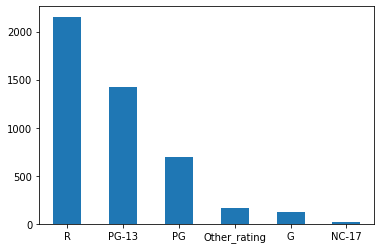

In [67]:
# Now we have only 6 levels for conten_rating which are consistent with the rating system in use.
movie_df['content_rating'].value_counts().plot.bar(rot=0)

  **Numerical Variables**  
   - *Title_year*

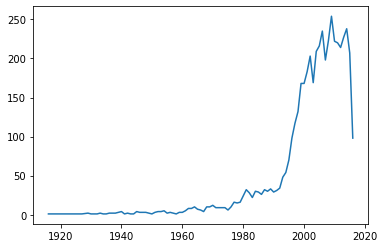

In [68]:
movie_visual = movie_df.copy()
movie_visual['title_year'].value_counts().sort_index().plot.line()

In [69]:
movie_visual.title_year.min(), movie_visual.title_year.max()

(1916.0, 2016.0)

In [70]:
num_60, num_70,num_80 = (movie_visual[movie_visual['title_year'] <= 1960].shape[0],
                        movie_visual[movie_visual['title_year'] <= 1970].shape[0],
                        movie_visual[movie_visual['title_year'] <=1980].shape[0])
print ("The number of movies before 1960 is: %d,"%num_60, "percentage:",num_60/4806*100)
print ("The number of movies before 1970 is: %d,"%num_70, "percentage:",num_70/4806*100)
print ("The number of movies before 1980 is: %d,"%num_80, "percentage:",num_80/4806*100)

The number of movies before 1960 is: 76, percentage: 1.581356637536413
The number of movies before 1970 is: 156, percentage: 3.245942571785269
The number of movies before 1980 is: 279, percentage: 5.805243445692884


*The movies released from 1916 to 1970 is only around 3% of the data, which indicated that these movies might not be typical and can be removed.*

In [71]:
movie_df.drop(movie_df[movie_df['title_year'] <= 1970].index, inplace = True)

  - Distribution of other numerical variables

In [72]:
movie_visual = movie_df.copy()

In [73]:
numLst = movie_df.select_dtypes(exclude='category').columns.tolist()
print (numLst)
print (len(numLst))

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
16


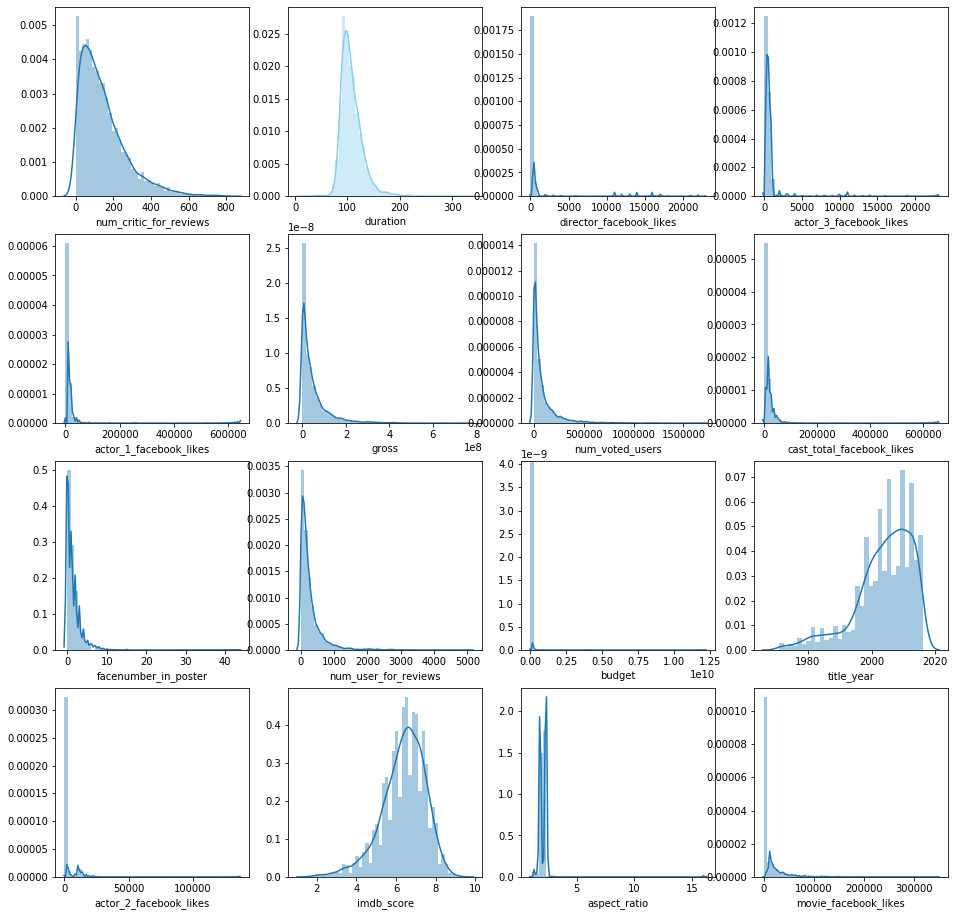

In [74]:
f, axes = plt.subplots(4, 4, figsize=(16, 16))
sns.distplot( movie_df["num_critic_for_reviews"], ax=axes[0, 0])
sns.distplot( movie_df["duration"] , color="skyblue", ax=axes[0, 1])
sns.distplot( movie_df["director_facebook_likes"], ax=axes[0, 2])
sns.distplot( movie_df["actor_3_facebook_likes"], ax=axes[0, 3])
sns.distplot( movie_df["actor_1_facebook_likes"], ax=axes[1, 0])
sns.distplot( movie_df["gross"].dropna(), ax=axes[1, 1])
sns.distplot( movie_df["num_voted_users"], ax=axes[1, 2])
sns.distplot( movie_df["cast_total_facebook_likes"], ax=axes[1, 3])
sns.distplot( movie_df["facenumber_in_poster"], ax=axes[2, 0])
sns.distplot( movie_df["num_user_for_reviews"], ax=axes[2, 1])
sns.distplot( movie_df["budget"].dropna(), ax=axes[2, 2])
sns.distplot( movie_df["title_year"], ax=axes[2, 3])
sns.distplot( movie_df["actor_2_facebook_likes"], ax=axes[3, 0])
sns.distplot( movie_df["imdb_score"], ax=axes[3, 1])
sns.distplot( movie_df["aspect_ratio"].dropna(), ax=axes[3, 2])
sns.distplot( movie_df["movie_facebook_likes"], ax=axes[3, 3])

Profit is an important factor to evaluate the movies. It can be calculated by 'gross'-'budget'.  
Adding a new "profit" column to the dataframe to take insights into relationships of these features, and trying to find something interesting.

In [75]:
movie_visual['profit'] = movie_visual['gross'] - movie_visual['budget']

#### 2.3.2 Bivariate Plots

In [76]:
movie_visual.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


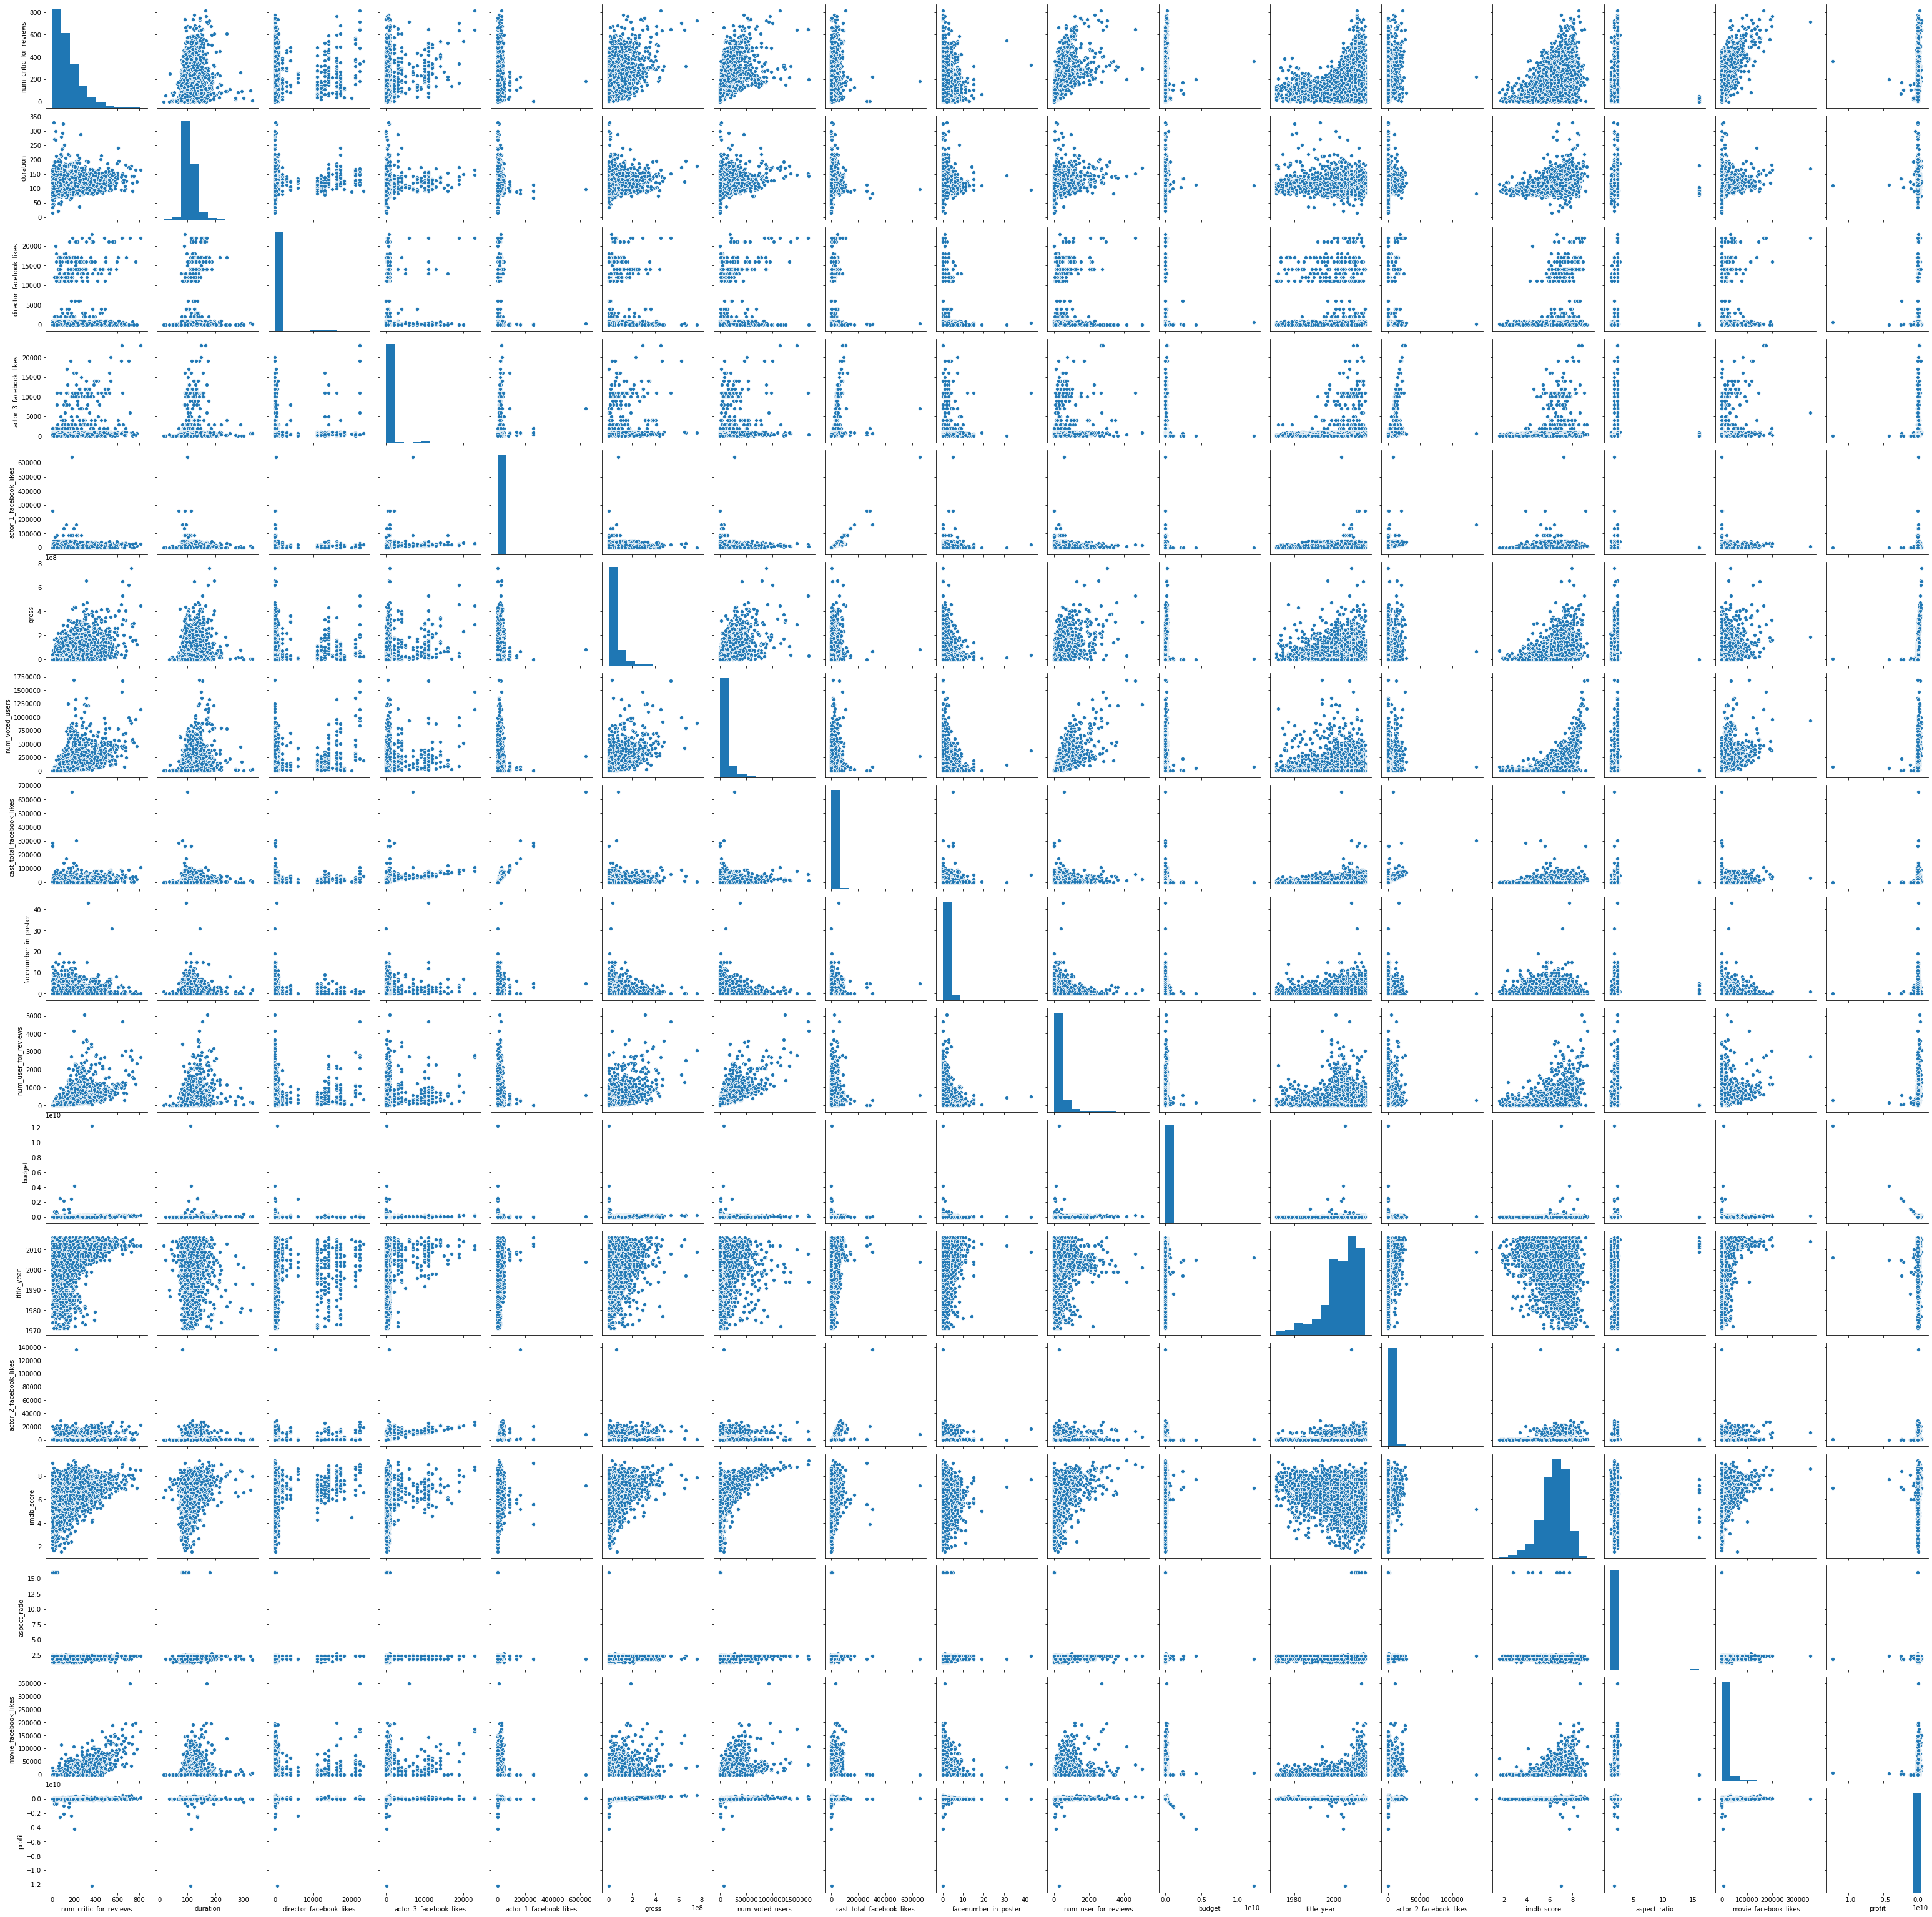

In [77]:
sns.pairplot(movie_visual)

In [78]:
# Feature names which are postive correlated with imbd_score.
movie_visual.columns[0],movie_visual.columns[5],movie_visual.columns[6],movie_visual.columns[8],movie_visual.columns[14]

('num_critic_for_reviews',
 'gross',
 'num_voted_users',
 'facenumber_in_poster',
 'actor_2_facebook_likes')

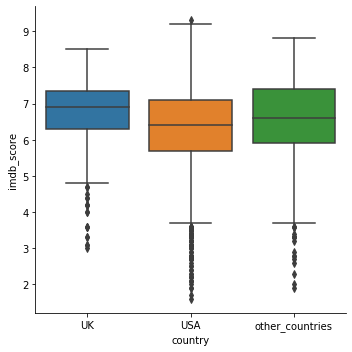

In [79]:
# IMDb score with content_rating
sns.catplot(x="country",y="imdb_score",kind='box',data=movie_visual)

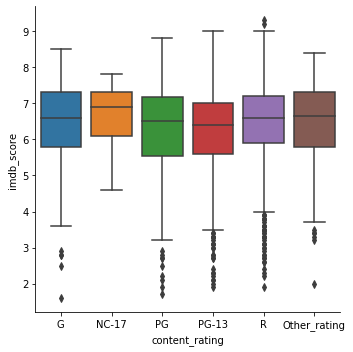

In [80]:
sns.catplot(x="content_rating",y="imdb_score",kind='box',data=movie_visual)

  - *Correlations between variables*

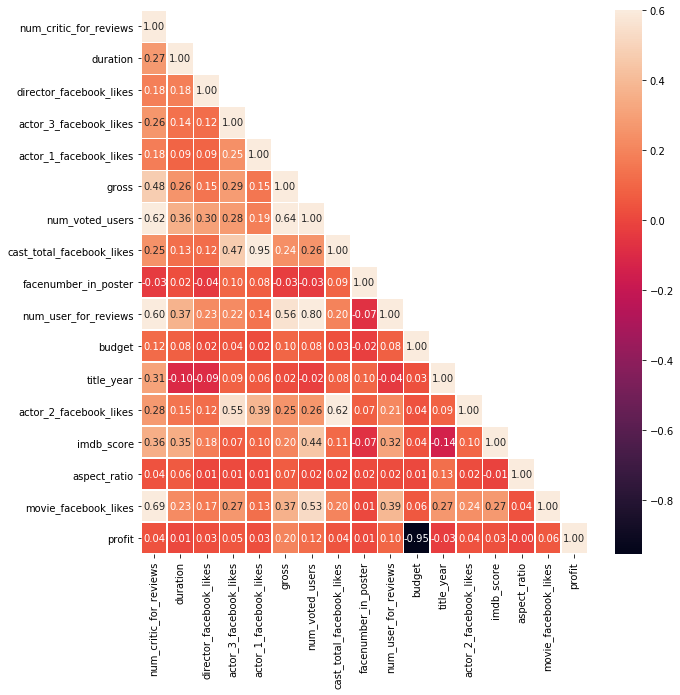

In [81]:
corr = movie_visual.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,mask=mask, vmax=.6,annot=True, linewidths=.5,fmt='.2f')

In [82]:
corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.272935,0.182937,0.264946,0.181018,0.476348,0.619962,0.252268,-0.033165,0.601108,0.116563,0.309635,0.275925,0.355966,0.037926,0.688521,0.039371
duration,0.272935,1.000000,0.184831,0.138334,0.092949,0.257515,0.357989,0.131862,0.023679,0.370538,0.079498,-0.101931,0.146956,0.350493,0.063198,0.227004,0.005580
director_facebook_likes,0.182937,0.184831,1.000000,0.124966,0.091898,0.147032,0.303673,0.121566,-0.041444,0.225269,0.020920,-0.091018,0.122013,0.179935,0.005139,0.165728,0.025206
actor_3_facebook_likes,0.264946,0.138334,0.124966,1.000000,0.246433,0.290464,0.278629,0.467176,0.102363,0.224858,0.043695,0.085938,0.553601,0.068798,0.012036,0.270091,0.048500
actor_1_facebook_likes,0.181018,0.092949,0.091898,0.246433,1.000000,0.152662,0.186353,0.952510,0.075705,0.139221,0.019382,0.061022,0.385268,0.098215,0.011309,0.131004,0.028781
gross,0.476348,0.257515,0.147032,0.290464,0.152662,1.000000,0.636546,0.239560,-0.029383,0.561673,0.100287,0.021391,0.254417,0.203855,0.068650,0.366061,0.204939
num_voted_users,0.619962,0.357989,0.303673,0.278629,0.186353,0.636546,1.000000,0.256293,-0.031250,0.795194,0.077091,-0.018964,0.263241,0.443794,0.018739,0.531143,0.124727
cast_total_facebook_likes,0.252268,0.131862,0.121566,0.467176,0.952510,0.239560,0.256293,1.000000,0.094759,0.198736,0.032144,0.082725,0.622812,0.111297,0.015164,0.201967,0.043315
facenumber_in_poster,-0.033165,0.023679,-0.041444,0.102363,0.075705,-0.029383,-0.031250,0.094759,1.000000,-0.072861,-0.020025,0.098249,0.073475,-0.071370,0.016016,0.008739,0.012136
num_user_for_reviews,0.601108,0.370538,0.225269,0.224858,0.139221,0.561673,0.795194,0.198736,-0.072861,1.000000,0.082387,-0.037458,0.213623,0.318751,0.017585,0.393392,0.096681


**Highly correlated variables**  

Based on the heatmap:  

*'actor_1_facebook_likes' and 'cast_total_facebook_likes' are highly correlated (corr=0.95). 'actor_2_facebook_likes' and 'actor_3_facebook_likes' are also correlated to  'cast_total_facebook_likes'. It is better to remove  'cast_total_facebook_likes', and combine actor 2 and actor 3 as 'other_actors_facebook_likes'.*

*'num_voted_users', 'num_user_for_reviews','num_critic_for_reviews' are also highly correlated each other. Based on the meaning of variables, 'num_voted_users' should be keeped. We can calculate the ratio of critic reviews from 'num_user_for_reviews','num_critic_for_reviews', which might be significant to IMDb scores. Then remove these two variables.*

*'movie_facebook_likes' is also highly correlated with 'num_critic_for_reviews'. As latter one would be removed after calculating the ratio of critic reviews, we will keep it temporarily.*

In [83]:
# Combining actor 2 and actor 3 as 'other_actors_facebook_likes'.
movie_df['other_actors_facebook_likes'] = movie_df['actor_2_facebook_likes'] + movie_df['actor_3_facebook_likes']

# removing 'cast_total_facebook_likes','actor_2_facebook_likes' and 'actor_3_facebook_likes'.
movie_df.drop(['actor_2_facebook_likes','actor_3_facebook_likes', 'cast_total_facebook_likes'], axis=1, inplace=True)

In [84]:
# Calculating the ratios of  actor 2 and actor 3 as 'other_actors_facebook_likes'.
movie_df['ratio_critic_for_reviews'] = movie_df['num_critic_for_reviews'] / movie_df['num_user_for_reviews']
# removing 'num_critic_for_reviews','num_user_for_reviews'.
movie_df.drop(['num_critic_for_reviews','num_user_for_reviews'], axis=1, inplace=True)

*Checking the correlations of variables again.*  

There is no corr value larger than 0.6.

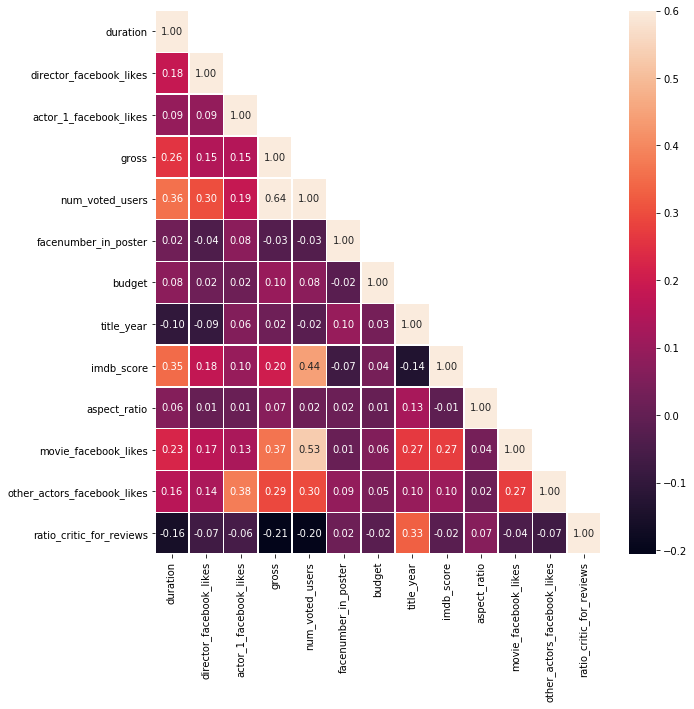

In [85]:
corr = movie_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,mask=mask, vmax=.6,annot=True, linewidths=.5,fmt='.2f')

In [86]:
movie_df.shape

(4650, 15)

In [87]:
4650/5024

0.9255573248407644

**By now, We just lost 8% data, which is acceptable.**

#### 3. Data Pre-processing

   **3.1 Bin Response Variable**
   
*This project is about to predict whether one movie is good or not, so that the response variable should be binned into ranks.*   

        < 4 -- bad -- imdb_class:0  
        4 ~ 6 -- avarage -- imdb_class:1  
        6 ~ 8 -- good -- imdb_class:2 
        8 ~ 10 -- excellent -- imdb_class:2

In [88]:
movie_df["imdb_class"]=pd.cut(movie_df['imdb_score'], bins=[0,4,6,8,10], right=False, 
                              labels=False)
movie_df.drop('imdb_score', axis=1, inplace=True)

In [89]:
movie_df["imdb_class"].unique()

array([2, 3, 1, 0])

In [90]:
movie_df["imdb_class"].value_counts() # Unbanlanced data

2    3019
1    1256
3     230
0     145
Name: imdb_class, dtype: int64

In [91]:
movie_df.to_csv('movie_df.csv',index=False)

### 4. Machine Learning models

#### 4.1 Make a pipeline for data preprocessing
 *Spliting the data into the train and test sets.
 *Including imputation Nas, one-hot code the categorical features, standardizing  the numerical features.

In [92]:
movie = pd.read_csv('movie_df.csv')

In [93]:
movie.shape

(4650, 15)

In [94]:
movie.isna().sum()

duration                         0
director_facebook_likes          0
actor_1_facebook_likes           0
gross                          607
num_voted_users                  0
facenumber_in_poster             0
country                          0
content_rating                 215
budget                         354
title_year                       0
aspect_ratio                   261
movie_facebook_likes             0
other_actors_facebook_likes      0
ratio_critic_for_reviews         0
imdb_class                       0
dtype: int64

In [95]:
featureLst = movie.columns.values[movie.columns.values!='imdb_class'].tolist()
numeri = movie.select_dtypes(include=['int64', 'float64']).columns.values
num_features = numeri[numeri!='imdb_class'].tolist()
cat_features = movie.select_dtypes(include=['object']).columns.tolist()

In [96]:
print ("Features list:\n", featureLst)
print ()
print ("Numerical features list:\n", num_features)
print ()
print ("Categorical features list:\n", cat_features)

Features list:
 ['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'facenumber_in_poster', 'country', 'content_rating', 'budget', 'title_year', 'aspect_ratio', 'movie_facebook_likes', 'other_actors_facebook_likes', 'ratio_critic_for_reviews']

Numerical features list:
 ['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'facenumber_in_poster', 'budget', 'title_year', 'aspect_ratio', 'movie_facebook_likes', 'other_actors_facebook_likes', 'ratio_critic_for_reviews']

Categorical features list:
 ['country', 'content_rating']


In [97]:
def spilt_df(df):
    """
    Split data into train and test sets with ratio 4:1, make sure to get a similar classes destribution. 
    Return X_train, X_test, y_train, y_test.
    """

    featureLst = df.columns.values[df.columns.values!='imdb_class'].tolist()
    X_train, X_test, y_train, y_test = train_test_split(df[featureLst],
                                                    df.imdb_class,
                                                    test_size = 0.2,
                                                    random_state=42,
                                                    stratify = df.imdb_class)
    return (X_train, X_test, y_train, y_test)

In [98]:
def process_df (df):    
    """
    Make a pipeline for data processing:
       Impute Nas: numerical variables with median, categorical variables with most_frequent.
       Standardize the numerical variables.
       One hot code the categorical variables.
    Return a numpy array after process the dataframe.
    """
    num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df.select_dtypes(include=['object']).columns.tolist()
       
    # Data Preprocessing: imputing na, standardized the numerical variables, one-hot code categorical variables.
    num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])

    cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy="most_frequent")),
                                      ('onehot', OneHotEncoder())])

    preprocessor = ColumnTransformer(transformers=[
                                    ('num', num_transformer, num_features),
                                    ('cat', cat_transformer, cat_features)
                                    ])
    X = preprocessor.fit_transform(df)
    return X

In [99]:
def evaluate_model(estimator,X_test, y_test):
    """
    Predict the test data using the estimator.
    Print the classification report.
    Plot the confusion matrix.
    """ 
    y_pred = estimator.predict(X_test)    
    # Find the target names from test dataset.
    class_dic = {'0': 'bad','1':'average','2':'good','3':'excellent'}
    labels= np.unique(y_test)
    target_names = [class_dic[str(i)] for i in labels]

    print (classification_report(y_test, y_pred, target_names=target_names))  
    
    # Plot confusion matrix
    plot_confusion_matrix(estimator, X_test, y_test,
                      display_labels = ['bad','average','good','excellent'],
                      cmap = 'GnBu')
    plt.show()

In [100]:
X_train, X_test, y_train, y_test = spilt_df(movie)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3720, 14), (930, 14), (3720,), (930,))

In [102]:
y_train.value_counts(), y_test.value_counts()

(2    2415
 1    1005
 3     184
 0     116
 Name: imdb_class, dtype: int64,
 2    604
 1    251
 3     46
 0     29
 Name: imdb_class, dtype: int64)

In [103]:
X_train, y_train, X_test,y_test = process_df(X_train),np.array(y_train), process_df(X_test),np.array(y_test)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3720, 21), (930, 21), (3720,), (930,))

#### 1. Logistic Regression

In [105]:
def log_pipeline(X_train, y_train, params):
    """
    Apply multiclass logistic regressioon algorithm.
    Hyperparameter-tuning and cross validation.
    Return the best estimator.
    """
    logic = LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=10000)
    # Gridsearchcv for hyperparameter tuning and cross validation.
    grid_logic = GridSearchCV(logic,
                            params,
                            cv=5
                           )
        
    grid_logic.fit(X_train, y_train)
        
    print ("Logistic Regression model's best params: ", grid_logic.best_params_, "\n")
    print ("Logistic Regression model's best scores: ", grid_logic.best_score_, "\n")
        
    # Choose the best model.
    final_model = grid_logic.best_estimator_
    
    return final_model

In [106]:
log_params = {
    'C': [0.001, 0.01,0.1, 1.0],
    }
log_estimator = log_pipeline (X_train, y_train, log_params)

Logistic Regression model's best params:  {'C': 0.1} 

Logistic Regression model's best scores:  0.7029569892473119 



Confusion Matrix of Logistic Regression model: 

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
     average       0.63      0.39      0.48       251
        good       0.75      0.92      0.83       604
   excellent       0.71      0.43      0.54        46

    accuracy                           0.73       930
   macro avg       0.52      0.44      0.46       930
weighted avg       0.69      0.73      0.69       930



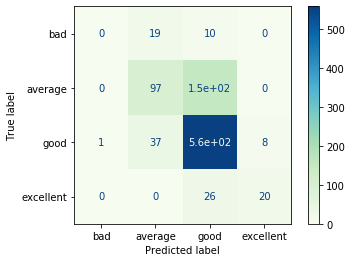

In [107]:
print ('Confusion Matrix of Logistic Regression model: \n')
evaluate_model(log_estimator,X_test, y_test)

#### 2. Random Forest Classifier

In [108]:
def rf_pipeline(X_train,y_train,params):
    """
    Apply random forest algorithm.
    Hyperparameter-tuning and cross validation.
    Return the best estimator.
    """
    
    rf = RandomForestClassifier()
    grid_rf = GridSearchCV(rf,
                           params,
                           cv=5
                             )
        
    grid_rf.fit(X_train, y_train)
        
    print ("Random Forest Classifier model's best params: ", grid_rf.best_params_, "\n")
    print ("Random Forest Classifier model's best scores: ", grid_rf.best_score_, "\n")
        
    # Choose the best model.
    final_model = grid_rf.best_estimator_
    
    return final_model

In [109]:
rf_params = {  
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300]
}

rf_estimator = rf_pipeline(X_train, y_train, rf_params)

Random Forest Classifier model's best params:  {'max_depth': 100, 'max_features': 3, 'n_estimators': 300} 

Random Forest Classifier model's best scores:  0.7438172043010753 



              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        29
     average       0.73      0.36      0.48       251
        good       0.73      0.96      0.83       604
   excellent       0.89      0.35      0.50        46

    accuracy                           0.74       930
   macro avg       0.59      0.42      0.45       930
weighted avg       0.72      0.74      0.70       930



/Users/jill/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


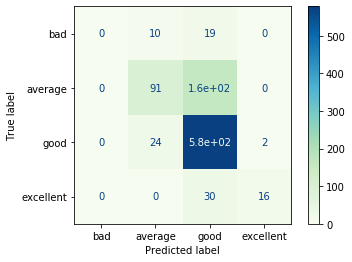

In [110]:
evaluate_model(rf_estimator,X_test,y_test)

#### 3. XGBoost Classifier 

In [111]:
def xgb_preprocess(df):
    """
    Data preprocessing for xgboost.
    Return a dataframe.
    """
    num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df.select_dtypes(include=['object']).columns.tolist()
    new_df = df.copy()
    imt_median = SimpleImputer(strategy='median')
    scaler = StandardScaler()
    new_df.loc[:,num_features] = imt_median.fit_transform(new_df.loc[:,num_features])
    new_df.loc[:,num_features] = scaler.fit_transform(new_df.loc[:,num_features])

    imt_freq = SimpleImputer(strategy='most_frequent')
    new_df.loc[:,cat_features] = imt_freq.fit_transform(new_df.loc[:,cat_features])
    new_df=pd.get_dummies(new_df)
    
    return new_df

In [112]:
def xgb_pipeline(X_train, y_train, params):
    """
    Apply multiclass logistic regressioon algorithm.
    Hyperparameter-tuning and cross validation.
    Return the best estimator.
    """
    xgb_features = X_train.columns.tolist()
    
    D_train = xgb.DMatrix(X_train, label=y_train,feature_names=xgb_features)
    xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=4)
    grid_xgb = GridSearchCV(xgb_clf,
                            params, 
                            cv=5,
                            n_jobs=4)
    
    grid_xgb.fit(X_train, y_train)
    print ("XGBoost Classifier model's best params: ", grid_xgb.best_params_, "\n")
    print ("XGBOOST Classifier model's best scores: ", grid_xgb.best_score_, "\n")
        
    # Choose the best model.
    final_model = grid_xgb.best_estimator_
    
    return final_model


In [113]:
X_train, X_test, y_train, y_test = spilt_df(movie)

In [114]:
xgb_X_train, xgb_X_test = xgb_preprocess(X_train), xgb_preprocess(X_test)

In [115]:
xgb_features = xgb_X_train.columns.tolist()

In [116]:
D_train = xgb.DMatrix(xgb_X_train, label=y_train,feature_names=xgb_features)
D_test = xgb.DMatrix( xgb_X_test, label=y_test,feature_names=xgb_features)

In [117]:
xgb_params = {
     "eta"    : [0.01,0.10,1 ] ,
     "max_depth"        : [3, 5],
     "colsample_bytree" : [0.3, 0.5 , 0.7]
     }
xgb_estimator = xgb_pipeline(xgb_X_train, y_train, xgb_params)

XGBoost Classifier model's best params:  {'colsample_bytree': 0.3, 'eta': 1, 'max_depth': 5} 

XGBOOST Classifier model's best scores:  0.750268817204301 



              precision    recall  f1-score   support

         bad       0.25      0.03      0.06        29
     average       0.54      0.35      0.42       251
        good       0.72      0.88      0.79       604
   excellent       0.61      0.41      0.49        46

    accuracy                           0.69       930
   macro avg       0.53      0.42      0.44       930
weighted avg       0.65      0.69      0.66       930



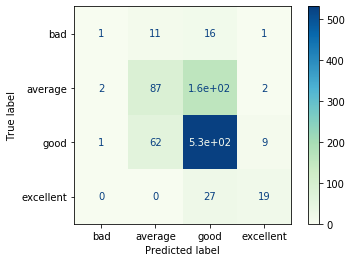

In [118]:
evaluate_model(xgb_estimator,xgb_X_test,y_test)

In [119]:
importances_dict = dict(zip(xgb_estimator.get_booster().feature_names,xgb_estimator.feature_importances_))

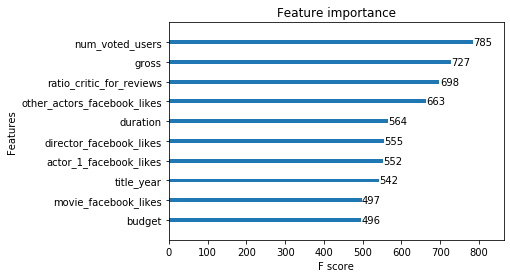

In [120]:
# Plot Important Features
plot_importance(xgb_estimator, max_num_features=10,grid=False) # top 10 most important features
plt.show()

#### 4. Deeping Learning Model with Keras

In [121]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [122]:
X_train, X_test, y_train, y_test = spilt_df(movie)

In [123]:
X_train, y_train, X_test,y_test = process_df(X_train),np.array(y_train), process_df(X_test),np.array(y_test)

In [124]:
def neural_network_model():
    # create neural network model
    model = Sequential()
    # Input layer
    model.add(Dense(8, activation='relu'))
    # output layer (4 classes)
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [125]:
cnn_estimator = KerasClassifier(build_fn=neural_network_model, verbose=0)

In [126]:
cnn_params = {'batch_size': [5, 10, 20],
              'epochs': [100,200]}
cnn_grid = GridSearchCV(estimator=cnn_estimator, 
                    param_grid=cnn_params, 
                    n_jobs=1,cv=5, verbose=3)

In [127]:
cnn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] batch_size=5, epochs=100 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=5, epochs=100, score=0.730, total= 1.3min
[CV] batch_size=5, epochs=100 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ............ batch_size=5, epochs=100, score=0.730, total= 1.3min
[CV] batch_size=5, epochs=100 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV] ............ batch_size=5, epochs=100, score=0.735, total= 1.3min
[CV] batch_size=5, epochs=100 ........................................
[CV] ............ batch_size=5, epochs=100, score=0.707, total= 1.3min
[CV] batch_size=5, epochs=100 ........................................
[CV] ............ batch_size=5, epochs=100, score=0.703, total= 1.3min
[CV] batch_size=5, epochs=200 ........................................
[CV] ............ batch_size=5, epochs=200, score=0.738, total= 2.6min
[CV] batch_size=5, epochs=200 ........................................
[CV] ............ batch_size=5, epochs=200, score=0.727, total= 2.7min
[CV] batch_size=5, epochs=200 ........................................
[CV] ............ batch_size=5, epochs=200, score=0.741, total= 2.8min
[CV] batch_size=5, epochs=200 ........................................
[CV] ............ batch_size=5, epochs=200, score=0.723, total= 2.7min
[CV] batch_size=5, epochs=200 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 35.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf561e52d0>,
             iid='deprecated', n_jobs=1,
             param_grid={'batch_size': [5, 10, 20], 'epochs': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [128]:
cnn_grid.best_score_, cnn_grid.best_params_

(0.7274193525314331, {'batch_size': 10, 'epochs': 100})

In [129]:
cnn_estimator = cnn_grid.best_estimator_

In [130]:
y_pred = cnn_estimator.predict(X_test)    
target_names = ['bad','average','good','excellent']

print (classification_report(y_test, y_pred, target_names=target_names)) 


              precision    recall  f1-score   support

         bad       0.30      0.10      0.15        29
     average       0.58      0.49      0.54       251
        good       0.77      0.86      0.81       604
   excellent       0.76      0.54      0.63        46

    accuracy                           0.72       930
   macro avg       0.60      0.50      0.53       930
weighted avg       0.70      0.72      0.71       930



In [131]:
df_cnn_cm = pd.DataFrame(confusion_matrix(y_test,y_pred))

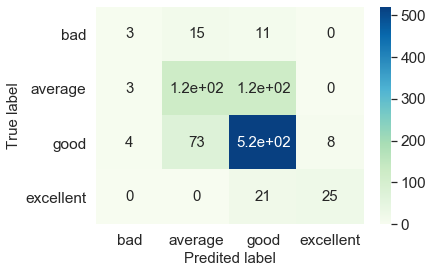

In [132]:

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cnn_cm, annot=True, 
            cmap = 'GnBu', 
            annot_kws={"size": 15},
            xticklabels=['bad','average','good','excellent'],
            yticklabels=['bad','average','good','excellent'],
            ) # font size

plt.xlabel('Predited label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True label', fontsize = 15)
plt.show()